## Loading the plant seedlings data





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the dataset


In [2]:
TrainPath = "/content/drive/My Drive/plants/train/"
TestPath = "/content/drive/My Drive/plants/test/"

In [3]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
seed = 7
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
#from keras import backend as K

#K.set_image_dim_ordering( 'tf' )

In [4]:
listing = os.listdir( TrainPath ) 
num_folders = len(listing)
print ( num_folders)
print (listing)

12
['Maize', 'Loose Silky-bent', 'Scentless Mayweed', 'Shepherds Purse', 'Common wheat', 'Small-flowered Cranesbill', 'Cleavers', 'Common Chickweed', 'Sugar beet', 'Fat Hen', 'Charlock', 'Black-grass']


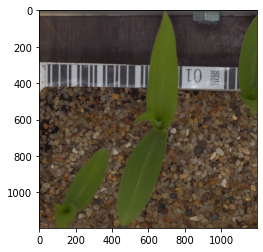

In [5]:
## Analyze the image dataset
# Read a sample image file
import skimage.io as io
path = "/content/drive/My Drive/plants/train/Maize/"
files = os.listdir(path)
#print(len(files))
#print(files[0])
#print(files[1])
imgfile = files[0]
img = io.imread(path + imgfile)

plt.imshow(img)
plt.show()

In [6]:
img.shape
# image is of shape 1196 * 1196 with 3 channels

(1196, 1196, 3)

In [ ]:
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

for imgFolder in listing:
  print(imgFolder)
  path = "/content/drive/My Drive/plants/train/" + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
x_train=trainImg

In [ ]:
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

path = "/content/drive/My Drive/plants/test/"
files = os.listdir( path ) 
for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
x_test=trainImg

In [7]:
## Supervised classification done through pixel based classification
# Changing dimensions to N x D = 512*512*3
# Number of samples training - 4750 and test - 794
N = 4750
x_tr = []
for i in range(N):
    x_tr.append(x_train[i,:].flatten())
x_te = []
for i in range(794):
    x_te.append(x_test[i,:].flatten())

In [ ]:
print(len(x_tr),len(x_tr[0]))
print(len(x_te),len(x_te[0]))

In [ ]:
class NN:
    def __init__(self):
        pass
    
    # Memorize the training data    
    def train(self, X, y):
        # X is 2D if size N x D = 28x28, so each row is an example
        # y is 1D of size N
        self.tr_x = X
        self.tr_y = y
        
    # For the test image:
    #  find nearest train image with minimum distance from the test image
    #  predict the label of nearest training image
    def predict(self, x):
        # x is of size D = 28x28 for which we want to predict the label
        # returns the predicted label for the input x
        min_idx = None
        min_dist = 100000000
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                dist += abs(float((self.tr_x[test_sample][each_value] - x[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx]   

In [ ]:
classifier = NN()
classifier.train(x_tr, y_train)

In [ ]:
## Validate the results
plt.figure(figsize=(2,2))
plt.imshow(x_test[3])
plt.show()
print(classifier.predict(x_te[3]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[2])
plt.show()
print(classifier.predict(x_te[2]))

In [8]:
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "/content/drive/My Drive/plants/train/" + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")

Maize
Loose Silky-bent
Scentless Mayweed
Shepherds Purse
Common wheat
Small-flowered Cranesbill
Cleavers
Common Chickweed
Sugar beet
Fat Hen
Charlock
Black-grass
1666.8098571300507  seconds


In [9]:
trainImagesPaths[1] # gives the path to the first image

'/content/drive/My Drive/plants/train/Maize/006196e1c.png'

In [10]:
trainImgNParray = np.asarray(trainImg) # create an array of all the images (not the paths)
trainlabel = pd.DataFrame(trainImagesCategories) # dataframe of all the categories matching each image

In [11]:
# check the length of the training images for confirmation
len(trainImgNParray)

4750

In [12]:
# check the length of labels for confirmation
len(trainlabel)

4750

In [13]:
# checking the shape of the first image.
trainImgNParray.shape

(4750, 71, 71, 3)

In [14]:
type(trainImgNParray) # verifing the data type

numpy.ndarray

In [15]:
len(trainImagesPaths)   

4750

In [16]:
print(trainImagesPaths[0:5])

['/content/drive/My Drive/plants/train/Maize/00a18f05e.png', '/content/drive/My Drive/plants/train/Maize/006196e1c.png', '/content/drive/My Drive/plants/train/Maize/0086c28b2.png', '/content/drive/My Drive/plants/train/Maize/107bd7230.png', '/content/drive/My Drive/plants/train/Maize/030e7f9ef.png']


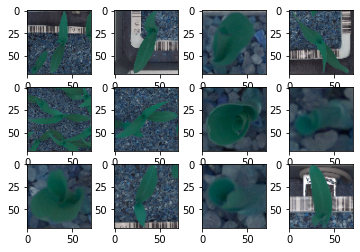

In [17]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(trainImg[i])

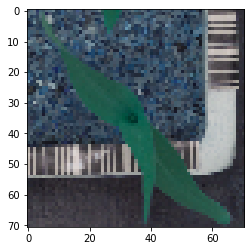

In [18]:
plt.imshow(trainImg[3])

In [19]:
im = trainImg[3]
im.shape

(71, 71, 3)

In [20]:
trainArray[7][0]

'/content/drive/My Drive/plants/train/Maize/194d34152.png'

In [21]:
trainImgNParray.shape

(4750, 71, 71, 3)

In [22]:
trainlabel.shape

(4750, 1)

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


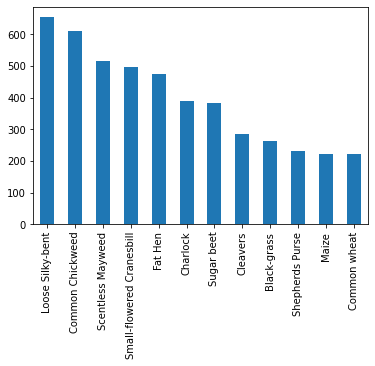

In [23]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainlabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainlabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainlabel[0].value_counts().plot(kind='bar')

In [24]:
# normalize the training data
trainImg = trainImgNParray/255

In [35]:
from sklearn.model_selection import train_test_split
# I used a 90% - 10% test train split, stratified according to training labels.  The code is from NikKonst (2018)
trainX, testX, trainY, testY = train_test_split(trainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

In [36]:
# Check the shape of train/test/validation data
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(4275, 71, 71, 3)
(475, 71, 71, 3)
(4275, 12)
(475, 12)


In [72]:
## Create Neural Network Model 

import tensorflow as tf
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 71*71 to 5041
model.add(tf.keras.layers.Reshape((15123,),input_shape=(71,71,3)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


In [73]:
# Adding Hidden Layers and Output Layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='softmax'))

In [74]:
#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 15123)             0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15123)             60492     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               3024800   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 12)                1212      
Total params: 3,106,604
Trainable params: 3,076,358
Non-trainable params: 30,246
_________________________________________________________________


In [41]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [42]:
testY.shape

(475, 12)

In [76]:
model.fit(trainX,trainY,        
          validation_data=(testX,testY),
          epochs=30,
          batch_size=128)

Epoch 1/30
34/34 [==============================] - 1s 13ms/step - loss: 3.0389 - accuracy: 0.2487 - val_loss: 2.7393 - val_accuracy: 0.1305
Epoch 2/30
34/34 [==============================] - 0s 8ms/step - loss: 1.2862 - accuracy: 0.6359 - val_loss: 2.3823 - val_accuracy: 0.1558
Epoch 3/30
34/34 [==============================] - 0s 8ms/step - loss: 0.6511 - accuracy: 0.8023 - val_loss: 2.1538 - val_accuracy: 0.2232
Epoch 4/30
34/34 [==============================] - 0s 8ms/step - loss: 0.3433 - accuracy: 0.9061 - val_loss: 2.0417 - val_accuracy: 0.2737
Epoch 5/30
34/34 [==============================] - 0s 8ms/step - loss: 0.2457 - accuracy: 0.9309 - val_loss: 1.9708 - val_accuracy: 0.3011
Epoch 6/30
34/34 [==============================] - 0s 8ms/step - loss: 0.1526 - accuracy: 0.9597 - val_loss: 1.8005 - val_accuracy: 0.3747
Epoch 7/30
34/34 [==============================] - 0s 8ms/step - loss: 0.1524 - accuracy: 0.9635 - val_loss: 1.6136 - val_accuracy: 0.4147
Epoch 8/30
34/34 [=

Above Neural Network model is overfit as the number of trainable parameters is very high 

In [77]:
# Validation accuracy
model.evaluate(testX,testY)

15/15 [==============================] - 0s 3ms/step - loss: 3.9969 - accuracy: 0.4737


[3.9969043731689453, 0.4736842215061188]

In [78]:
# Training Accuracy
model.evaluate(trainX,trainY)

134/134 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9911


[0.030192643404006958, 0.9911110997200012]

In [80]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNNProject1/plants_nn.h5')

Build **CNN model** for the image classification

In [48]:
## CNN Model
scaleTo=71
num_classes=12
model1 = Sequential() 
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
model1.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
model1.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model1.add(layers.MaxPooling2D((2, 2))) 
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2))) 
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2))) 
model1.add(layers.Flatten()) 
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(num_clases, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 69, 69, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)        

In [49]:
t0=time.time()
#hist = model1.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)
model1.fit(trainX, trainY, batch_size=75,epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model1.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/35
57/57 - 7s - loss: 2.4064 - accuracy: 0.1651 - val_loss: 2.2450 - val_accuracy: 0.2526
Epoch 2/35
57/57 - 1s - loss: 1.9382 - accuracy: 0.3404 - val_loss: 1.7394 - val_accuracy: 0.3979
Epoch 3/35
57/57 - 1s - loss: 1.6114 - accuracy: 0.4253 - val_loss: 1.4800 - val_accuracy: 0.4463
Epoch 4/35
57/57 - 1s - loss: 1.4435 - accuracy: 0.4868 - val_loss: 1.3246 - val_accuracy: 0.5116
Epoch 5/35
57/57 - 1s - loss: 1.2886 - accuracy: 0.5497 - val_loss: 1.2222 - val_accuracy: 0.5495
Epoch 6/35
57/57 - 1s - loss: 1.1807 - accuracy: 0.5822 - val_loss: 1.1482 - val_accuracy: 0.6000
Epoch 7/35
57/57 - 1s - loss: 1.0383 - accuracy: 0.6426 - val_loss: 0.9548 - val_accuracy: 0.6632
Epoch 8/35
57/57 - 1s - loss: 0.9684 - accuracy: 0.6632 - val_loss: 0.9394 - val_accuracy: 0.6632
Epoch 9/35
57/57 - 1s - loss: 0.8377 - accuracy: 0.7142 - val_loss: 0.8208 - val_accuracy: 0.7053
Epoch 10/35
57/57 - 1s - loss: 0.7505 - accuracy: 0.7434 - val_loss: 0.6935 - val_accuracy: 0.7326
Epoch 11/35
57/57 -

In [50]:
# Validation accuracy
model1.evaluate(testX,testY)

15/15 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.8442


[0.5249593257904053, 0.8442105054855347]

In [51]:
# Training accuracy
model1.evaluate(trainX,trainY)

134/134 [==============================] - 0s 4ms/step - loss: 0.1296 - accuracy: 0.9588


[0.12962503731250763, 0.9588304162025452]

In [63]:
model1.save('/content/drive/MyDrive/Colab Notebooks/CNNProject1/plants_cnn_v1.h5')

In [79]:
# Creating another version of CNN model with Global Pooling 
## CNN Model
scaleTo=71
num_classes=12

#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model2 = tf.keras.models.Sequential()

#normalize data
model2.add(tf.keras.layers.BatchNormalization(input_shape=(scaleTo, scaleTo,3,)))

#Add Conv Layer
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))

#Add Max Pool layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Conv Layer
model2.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model2.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))

#Add Max Pool layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Conv Layer
model2.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model2.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))

#Add Max Pool layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


#Add Dense Layers after flattening the data
model2.add(tf.keras.layers.Flatten())
#Add Dropout
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(200, activation='relu'))

#Add Dropout
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(100, activation='relu'))

#Add Dropout
model2.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model2.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 71, 71, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 71, 71, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 71, 71, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 35, 35, 128)       5

In [69]:
model2.fit(trainX, trainY, batch_size=75,epochs=50, validation_data=(testX, testY), verbose=2)

Epoch 1/50
57/57 - 6s - loss: 3.0914 - accuracy: 0.2758 - val_loss: 3.4346 - val_accuracy: 0.1368
Epoch 2/50
57/57 - 5s - loss: 1.5006 - accuracy: 0.4924 - val_loss: 5.7222 - val_accuracy: 0.1368
Epoch 3/50
57/57 - 5s - loss: 1.2630 - accuracy: 0.5836 - val_loss: 7.8101 - val_accuracy: 0.1368
Epoch 4/50
57/57 - 5s - loss: 1.1222 - accuracy: 0.6299 - val_loss: 12.9122 - val_accuracy: 0.1368
Epoch 5/50
57/57 - 5s - loss: 0.9617 - accuracy: 0.6812 - val_loss: 7.0364 - val_accuracy: 0.1368
Epoch 6/50
57/57 - 5s - loss: 0.8115 - accuracy: 0.7251 - val_loss: 4.9814 - val_accuracy: 0.1474
Epoch 7/50
57/57 - 5s - loss: 0.6765 - accuracy: 0.7677 - val_loss: 3.0017 - val_accuracy: 0.2884
Epoch 8/50
57/57 - 5s - loss: 0.6440 - accuracy: 0.7764 - val_loss: 1.4372 - val_accuracy: 0.5389
Epoch 9/50
57/57 - 5s - loss: 0.5614 - accuracy: 0.8058 - val_loss: 0.6493 - val_accuracy: 0.7916
Epoch 10/50
57/57 - 5s - loss: 0.4810 - accuracy: 0.8342 - val_loss: 0.5093 - val_accuracy: 0.8189
Epoch 11/50
57/57 

In [70]:
# Validation accuracy
model2.evaluate(testX,testY)

15/15 [==============================] - 0s 14ms/step - loss: 0.5578 - accuracy: 0.8800


[0.5577996373176575, 0.8799999952316284]

In [71]:
# Training accuracy
model2.evaluate(trainX,trainY)

134/134 [==============================] - 2s 12ms/step - loss: 0.0499 - accuracy: 0.9867


[0.049895450472831726, 0.9866666793823242]

In [61]:
model2.save('/content/drive/MyDrive/Colab Notebooks/CNNProject1/plants_cnn_v2.h5')

## Part 2 - Model Analysis Findings

CNN model performed better than Neural Network due to the following reasons

The number of trainable parameters got reduced due to addition of convolution and max pooling layers

Neural Network model is overfit as training accuracy is close to 99 while validation gets dropped to 48.

The second version of CNN modified for more layers and drop out increased the accuracy more for both validation and training.

Supervised learning model will be based on pixel based classification. Though the model for this will not be very huge the accuracy for it is not significant to than Neural Network or CNN.


## Part 3 - Building image dataset for Automobiles


In [81]:
CarTrainPath = "/content/drive/My Drive/Cars/train/"
CarTestPath = "/content/drive/My Drive/Cars/test/"

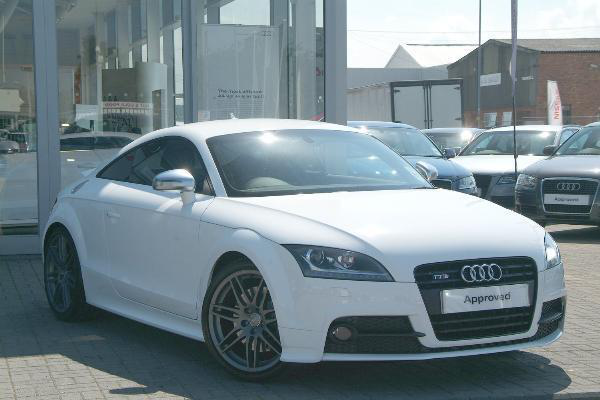

In [82]:
#Load an image using Keras image class
image_file =  CarTrainPath + 'Audi/00001.jpg'
image_file1 = CarTrainPath + 'Acura/00002.jpg'
car_image = tf.keras.preprocessing.image.load_img(image_file)
car_array = tf.keras.preprocessing.image.img_to_array(car_image)
car_image1 = tf.keras.preprocessing.image.load_img(image_file1)
car_array1 = tf.keras.preprocessing.image.img_to_array(car_image1)


#Inspect image
car_image

In [83]:
car_array.shape

(400, 600, 3)

### 15 images in training dataset are insepected manually and classified into their brands as labels. The data is bucketed into 12 classes. 
### Since there is no test data car images are downloaded from web. Since the number of records in training is less only 6 images are kept for test data.

In [84]:
#Check how data is organized between classes
!ls -l "/content/drive/My Drive/Cars/train/"

total 48
drwx------ 2 root root 4096 Feb 13 15:03 Acura
drwx------ 2 root root 4096 Feb 13 15:03 Audi
drwx------ 2 root root 4096 Feb 13 15:03 Buick
drwx------ 2 root root 4096 Feb 13 15:03 Chevrolet
drwx------ 2 root root 4096 Feb 13 15:03 Chrysler
drwx------ 2 root root 4096 Feb 13 15:03 Dodge
drwx------ 2 root root 4096 Feb 13 15:03 GMC
drwx------ 2 root root 4096 Feb 13 15:03 Hyundai
drwx------ 2 root root 4096 Feb 13 15:03 Lincoln
drwx------ 2 root root 4096 Feb 13 15:03 Mitsubishi
drwx------ 2 root root 4096 Feb 13 15:03 Nissan
drwx------ 2 root root 4096 Feb 13 15:03 Toyota


In [85]:
def plot_images(original_image, updated_image):
    
    plt.figure(figsize=(15,8))
    #Original image
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original_image)

    #Transformed image
    plt.subplot(1,2,2)
    plt.title('Transformed image')
    plt.imshow(updated_image)

    plt.show()

### Keras ImageDataGenerator is used to generate different versions of the image and due to low records this will be significantly used in train and test to generate more images and validate the data.

#### Import and display images with their labels and transformed images

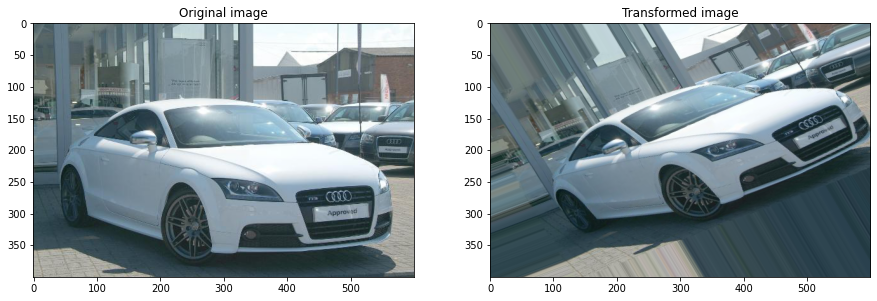

In [86]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)
transformed_array = transform_fn.random_transform(car_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(car_image, transformed_image)

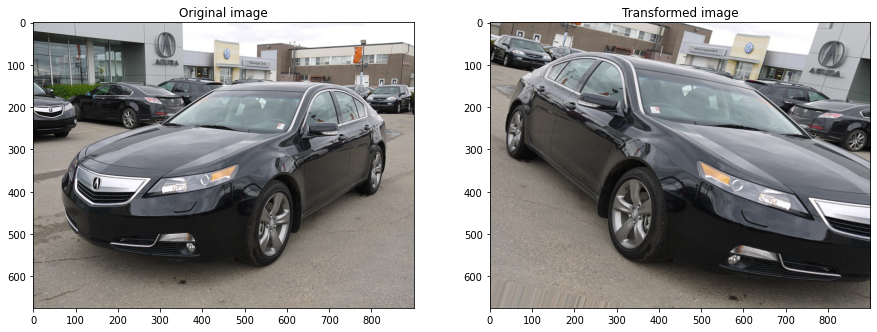

In [87]:
transformed_array1 = transform_fn.random_transform(car_array1)
transformed_image1 = tf.keras.preprocessing.image.array_to_img(transformed_array1)

plot_images(car_image1, transformed_image1)

Building an Image Data Generator to create multiple images with transformations in random fashion

In [88]:
# Set image size to standard as each image is of different width and height
img_size = 60
img_depth = 3


In [89]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.5,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

In [90]:
#Build training generator. 
train_generator = img_generator.flow_from_directory("/content/drive/My Drive/Cars/train",
                                                    target_size=(img_size, img_size),
                                                    subset='training',
                                                    batch_size=1)

#Build test generator
## for images without any classes split available
#test_generator = img_generator.flow_from_directory("/content/drive/My Drive/Cars",classes=['test'],
#                                                   target_size=(img_size, img_size),                                                   
#                                                   #subset='validation'
#                                                   )

test_generator = img_generator.flow_from_directory("/content/drive/My Drive/Cars/train",
                                                   target_size=(img_size, img_size),                                                   
                                                   subset='validation',
                                                   batch_size=1)

Found 13 images belonging to 12 classes.
Found 2 images belonging to 12 classes.


In [91]:
#Lets check the features (images) and Labels (flower class) returned by ImageDataGenerator
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (1, 60, 60, 3)
Actual labels shape (1, 12)


In [92]:
## Building CNN Model

#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model_cars = tf.keras.models.Sequential()

#normalize data
model_cars.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model_cars.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model_cars.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model_cars.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model_cars.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model_cars.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model_cars.add(tf.keras.layers.Flatten())
model_cars.add(tf.keras.layers.Dense(128, activation='relu'))

#Add Dropout
model_cars.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model_cars.add(tf.keras.layers.Dense(12, activation='softmax'))

In [93]:
#Specify Loass and Optimizer
model_cars.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
model_cars.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 60, 60, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [95]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Cars_cnn.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [96]:
model_cars.fit_generator(train_generator,
                    epochs=20,
                    steps_per_epoch= 13,  #Number of training images//batch_size
                    validation_data=test_generator,
                    validation_steps = 2, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


13/13 [==============================] - 4s 274ms/step - loss: 12.4191 - accuracy: 0.0474 - val_loss: 42.6407 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to Cars_cnn.h5
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 25.2033 - accuracy: 0.0474 - val_loss: 66.4073 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/20
13/13 [==============================] - 0s 16ms/step - loss: 49.6136 - accuracy: 0.0000e+00 - val_loss: 153.7706 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/20
13/13 [==============================] - 0s 16ms/step - loss: 49.6729 - accuracy: 0.2025 - val_loss: 120.3586 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/20
13/13 [==============================] - 0s 15ms/step - loss: 56.2676 - accuracy: 0.1992 - val_loss: 60.5264 - val_accuracy: 0.0000e+00

Epoch 00005: v

### Challenges Faced
Due to the less records accuracy is very less and model likely to become overfit.

Using ImageGenerator helps when we have significant records compared to the classes.

The classes are derived based on manual inspection but classes are almost equal to number of records making 1 record per class.